# AIR QUALITY PREDICTION

## Predicting the AQI of Chandigarh using Machine Learning Model


In this notebook, we're going to go through machine learning project with goal of predicting the Air Quality Index of Chandigarh.

## 1. Problem Definition

> How well can we predict AQI of Chandigarh, given its characteristics and previous examples.

## 2. Data

The data is downloaded from the Kaggle:
https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india


## 3. Evaluation

The evaluation metric for is the RMSLE (root mean squared log error) between the actual and predicted AQI values
The goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features
Kaggle provises a data dictionary detailing all of the features of the dataset. You can view this data dictionary in the data folder

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Getting the data ready


In [2]:
# Import the data
df = pd.read_csv("chandigarh-air-quality.csv")
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,8.06,102.43,12.46,5.19,NaN,1.34,0.57,4.28,26.41,3.51,0.71,6.09,NaN,NaN
1,6.79,92.50,9.81,6.27,17.02,0.88,0.48,6.08,33.65,4.27,0.65,5.66,NaN,NaN
2,3.52,82.72,8.03,5.63,14.01,0.73,0.39,6.60,47.60,3.13,0.36,3.06,NaN,NaN
3,3.04,79.30,7.45,4.55,12.21,0.75,0.34,7.27,55.97,NaN,NaN,NaN,NaN,NaN
4,5.17,80.34,7.65,4.24,11.86,0.71,0.45,8.31,54.32,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7263 entries, 0 to 7262
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       6599 non-null   float64
 1   PM10        6963 non-null   float64
 2   NO          6435 non-null   float64
 3   NO2         6556 non-null   float64
 4   NOx         6639 non-null   float64
 5   NH3         6437 non-null   float64
 6   CO          7147 non-null   float64
 7   SO2         7037 non-null   float64
 8   O3          6999 non-null   float64
 9   Benzene     6973 non-null   float64
 10  Toluene     6961 non-null   float64
 11  Xylene      6971 non-null   float64
 12  AQI         7081 non-null   float64
 13  AQI_Bucket  7081 non-null   object 
dtypes: float64(13), object(1)
memory usage: 794.5+ KB


## Choosing an estimator for our regression problem:

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


### Data Exploration

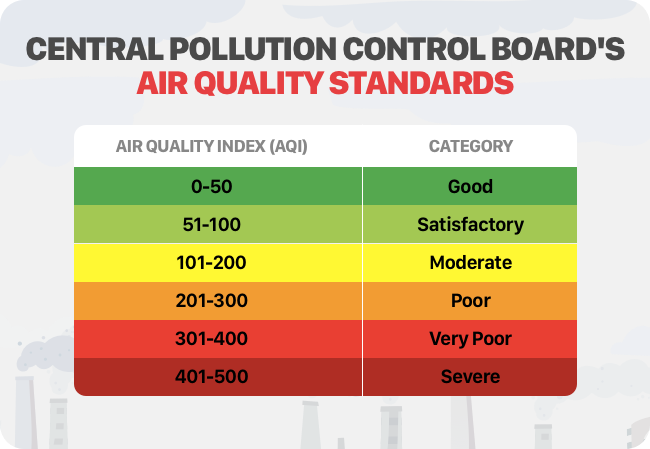

In [4]:
from IPython.display import Image, display
display(Image(filename='air-index.png'))

In [5]:
df['AQI_Bucket'].value_counts()

Satisfactory    3310
Moderate        1926
Good            1273
Poor             481
Very Poor         91
Name: AQI_Bucket, dtype: int64

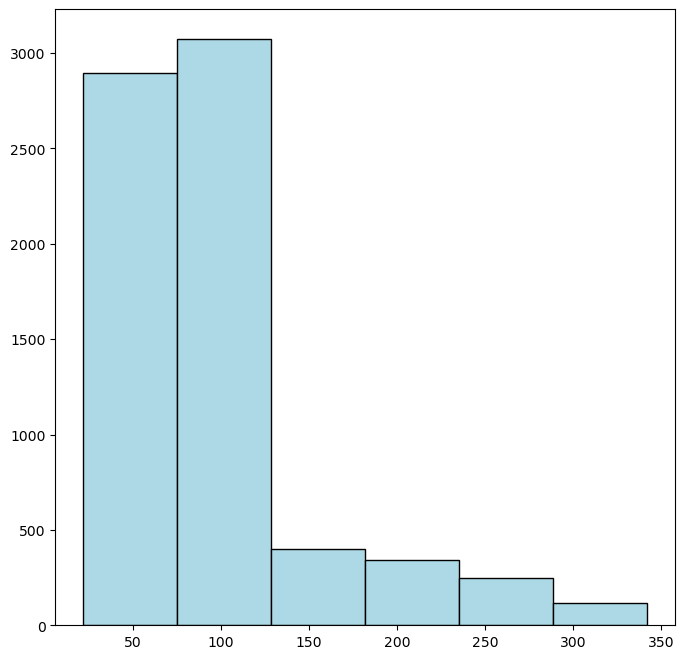

In [6]:
# Plot shows that most of AQI values in the range of the 50 to 150 (Good, Satisfactory, Moderate)
fig, ax = plt.subplots(figsize=(8,8))
ax.hist(df['AQI'], color='lightblue', bins=6, edgecolor='black');
plt.show()

In [7]:
df = df.sample(frac=1);
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
5524,6.30,25.14,1.39,8.15,5.44,27.87,0.35,5.81,42.72,1.55,0.46,0.90,43.0,Good
4524,24.11,54.24,1.58,14.66,8.97,51.11,0.50,9.03,9.10,4.07,2.59,1.28,46.0,Good
2238,77.57,125.80,NaN,NaN,NaN,NaN,0.56,11.02,20.62,5.96,0.28,0.35,202.0,Poor
642,NaN,NaN,10.68,3.16,10.37,5.84,0.29,11.33,NaN,2.77,1.32,1.41,47.0,Good
7085,2.10,32.37,1.26,8.53,3.72,16.79,0.30,2.50,39.36,1.31,0.04,0.33,51.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4835,23.31,80.74,19.06,17.98,24.13,68.09,1.00,14.85,2.66,7.15,0.38,1.44,74.0,Satisfactory
660,NaN,NaN,18.77,2.62,15.95,6.48,0.97,16.22,4.82,3.88,2.37,1.96,NaN,NaN
1747,89.55,129.34,NaN,9.00,0.00,NaN,0.89,9.57,3.46,1.29,4.84,4.17,205.0,Poor
225,NaN,140.39,6.67,2.30,8.93,1.13,0.66,12.88,46.30,7.55,3.45,0.99,112.0,Moderate


In [8]:
df_tmp = df.copy()
df_tmp

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
5524,6.30,25.14,1.39,8.15,5.44,27.87,0.35,5.81,42.72,1.55,0.46,0.90,43.0,Good
4524,24.11,54.24,1.58,14.66,8.97,51.11,0.50,9.03,9.10,4.07,2.59,1.28,46.0,Good
2238,77.57,125.80,NaN,NaN,NaN,NaN,0.56,11.02,20.62,5.96,0.28,0.35,202.0,Poor
642,NaN,NaN,10.68,3.16,10.37,5.84,0.29,11.33,NaN,2.77,1.32,1.41,47.0,Good
7085,2.10,32.37,1.26,8.53,3.72,16.79,0.30,2.50,39.36,1.31,0.04,0.33,51.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4835,23.31,80.74,19.06,17.98,24.13,68.09,1.00,14.85,2.66,7.15,0.38,1.44,74.0,Satisfactory
660,NaN,NaN,18.77,2.62,15.95,6.48,0.97,16.22,4.82,3.88,2.37,1.96,NaN,NaN
1747,89.55,129.34,NaN,9.00,0.00,NaN,0.89,9.57,3.46,1.29,4.84,4.17,205.0,Poor
225,NaN,140.39,6.67,2.30,8.93,1.13,0.66,12.88,46.30,7.55,3.45,0.99,112.0,Moderate


In [9]:
# Check missing values in the dataset
df_tmp.isna().sum()

PM2.5         664
PM10          300
NO            828
NO2           707
NOx           624
NH3           826
CO            116
SO2           226
O3            264
Benzene       290
Toluene       302
Xylene        292
AQI           182
AQI_Bucket    182
dtype: int64

In [10]:
df_tmp.drop(['AQI_Bucket'], axis=1, inplace=True)
df_tmp

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
5796,12.82,46.91,2.15,11.42,7.61,24.26,0.63,17.99,NaN,2.83,0.55,1.08,60.0
65,NaN,81.96,10.62,4.71,15.71,1.04,0.40,16.41,51.73,5.26,1.84,57.95,90.0
492,33.85,90.19,13.24,7.67,14.70,6.27,0.77,7.90,12.73,5.00,1.50,1.27,65.0
4637,11.82,33.96,4.61,16.85,12.60,67.91,0.31,9.75,27.78,3.19,3.58,0.66,50.0
2746,35.83,74.43,3.30,10.09,8.10,25.09,0.46,4.91,11.21,4.49,0.09,0.63,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,50.34,121.58,1.28,15.21,16.54,5.00,0.51,11.47,5.05,6.69,2.15,1.17,189.0
2587,103.85,120.42,7.28,10.70,11.59,29.38,0.65,7.38,3.11,6.63,0.25,0.90,105.0
4239,24.45,103.82,10.07,15.54,16.53,42.02,0.76,8.62,3.12,5.47,0.15,1.44,80.0
1092,77.52,151.79,22.93,8.18,23.01,7.30,1.02,11.59,12.69,8.58,0.81,1.60,174.0


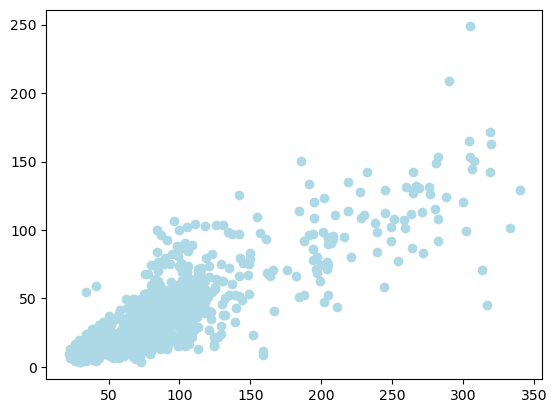

In [11]:
# Plot between The AQI and PM2.5 parameter
plt.scatter(df_tmp['AQI'][:1000],df_tmp['PM2.5'][:1000], color='lightblue')

In [12]:
df_tmp.isna().sum()

PM2.5      664
PM10       300
NO         828
NO2        707
NOx        624
NH3        826
CO         116
SO2        226
O3         264
Benzene    290
Toluene    302
Xylene     292
AQI        182
dtype: int64

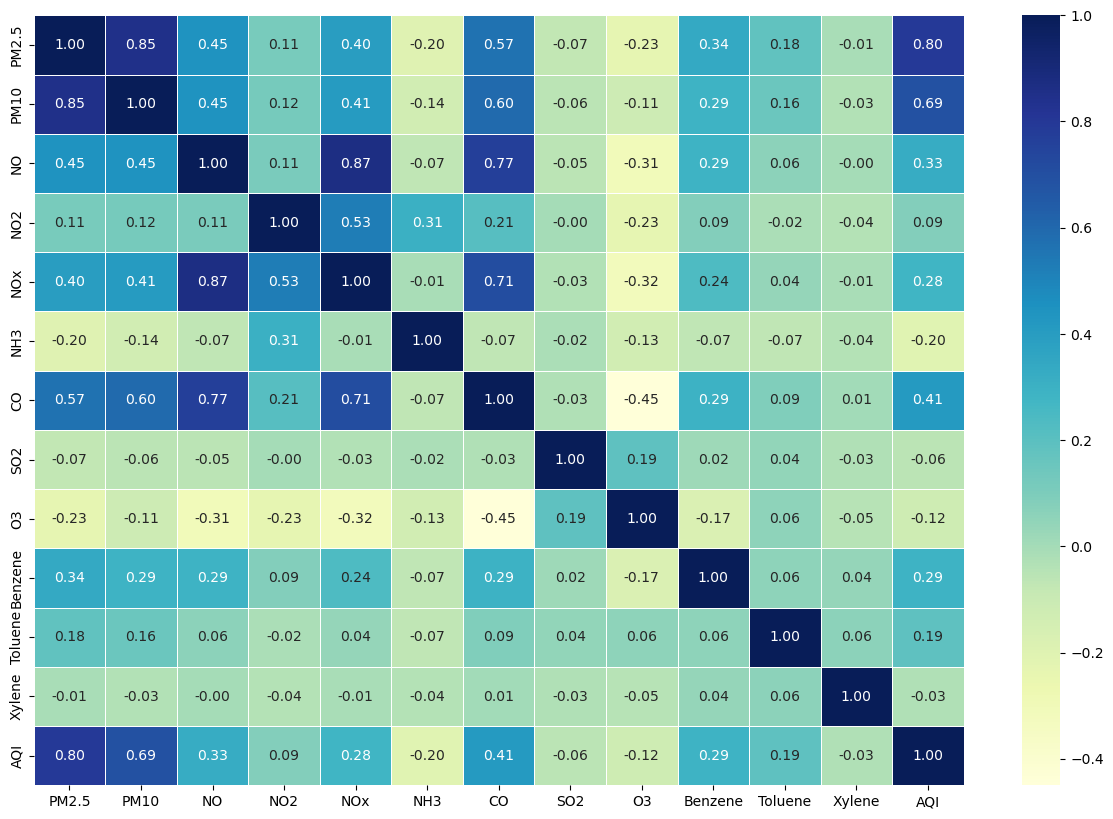

In [13]:
# Lets make a correlation Matrix
corr_matrix = df_tmp.corr()

fig,ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f', cmap="YlGnBu");

bottom,top = ax.get_ylim()
ax.set_ylim();

In [14]:
df_tmp

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
5796,12.82,46.91,2.15,11.42,7.61,24.26,0.63,17.99,NaN,2.83,0.55,1.08,60.0
65,NaN,81.96,10.62,4.71,15.71,1.04,0.40,16.41,51.73,5.26,1.84,57.95,90.0
492,33.85,90.19,13.24,7.67,14.70,6.27,0.77,7.90,12.73,5.00,1.50,1.27,65.0
4637,11.82,33.96,4.61,16.85,12.60,67.91,0.31,9.75,27.78,3.19,3.58,0.66,50.0
2746,35.83,74.43,3.30,10.09,8.10,25.09,0.46,4.91,11.21,4.49,0.09,0.63,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,50.34,121.58,1.28,15.21,16.54,5.00,0.51,11.47,5.05,6.69,2.15,1.17,189.0
2587,103.85,120.42,7.28,10.70,11.59,29.38,0.65,7.38,3.11,6.63,0.25,0.90,105.0
4239,24.45,103.82,10.07,15.54,16.53,42.02,0.76,8.62,3.12,5.47,0.15,1.44,80.0
1092,77.52,151.79,22.93,8.18,23.01,7.30,1.02,11.59,12.69,8.58,0.81,1.60,174.0


In [15]:
df_tmp.dropna(subset=['AQI'], inplace=True)
df_tmp

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
5796,12.82,46.91,2.15,11.42,7.61,24.26,0.63,17.99,NaN,2.83,0.55,1.08,60.0
65,NaN,81.96,10.62,4.71,15.71,1.04,0.40,16.41,51.73,5.26,1.84,57.95,90.0
492,33.85,90.19,13.24,7.67,14.70,6.27,0.77,7.90,12.73,5.00,1.50,1.27,65.0
4637,11.82,33.96,4.61,16.85,12.60,67.91,0.31,9.75,27.78,3.19,3.58,0.66,50.0
2746,35.83,74.43,3.30,10.09,8.10,25.09,0.46,4.91,11.21,4.49,0.09,0.63,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,50.34,121.58,1.28,15.21,16.54,5.00,0.51,11.47,5.05,6.69,2.15,1.17,189.0
2587,103.85,120.42,7.28,10.70,11.59,29.38,0.65,7.38,3.11,6.63,0.25,0.90,105.0
4239,24.45,103.82,10.07,15.54,16.53,42.02,0.76,8.62,3.12,5.47,0.15,1.44,80.0
1092,77.52,151.79,22.93,8.18,23.01,7.30,1.02,11.59,12.69,8.58,0.81,1.60,174.0


### Data Spliting

In [16]:
# Split the data into X and y
X = df_tmp.drop(['AQI'], axis=1)
y = df_tmp['AQI']

In [17]:
# Split the data into test and train datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
def fill_nan_values(dataframe):
    """
    Function that fills the nan value in the dataset.
    """
    for label,content in dataframe.items():
        if pd.api.types.is_float_dtype(content):
            dataframe[label] = dataframe[label].fillna(dataframe[label].median())
            
fill_nan_values(X_train)
fill_nan_values(X_test)
fill_nan_values(y_train)
fill_nan_values(y_test)

### Model Comparison

In [19]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LassoLars, LogisticRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = { 'Logistic Regressor': LogisticRegression(),
         'SVM': SVR(),
         'Ridge': Ridge(),
         'Lasso Lars': LassoLars(),
         'Lasso': Lasso(),
         'Random Forest Regressor': RandomForestRegressor(),
         'Deicision Tree Regressor': DecisionTreeRegressor()}


def model_fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    This function return the model scores for each estimator.
    model: a dictionary which conations estimators to be calculated,
    X_train: which contains the X train values.
    X_test: which contains the X test values.
    y_train: which conatins the y train values.
    y_test: which conatins the y test values.
    
    """
    model_scores = {}
    
    for name,model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        model_scores[name] = score

    return model_scores

model_scores = model_fit_and_score(models,X_train, X_test, y_train, y_test)
model_scores

C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regressor': 0.04446012702893437,
 'SVM': 0.5791139558725034,
 'Ridge': 0.6409628452375444,
 'Lasso Lars': 0.6410411531478687,
 'Lasso': 0.6410369580919772,
 'Random Forest Regressor': 0.8177596763963679,
 'Deicision Tree Regressor': 0.6250256704080073}

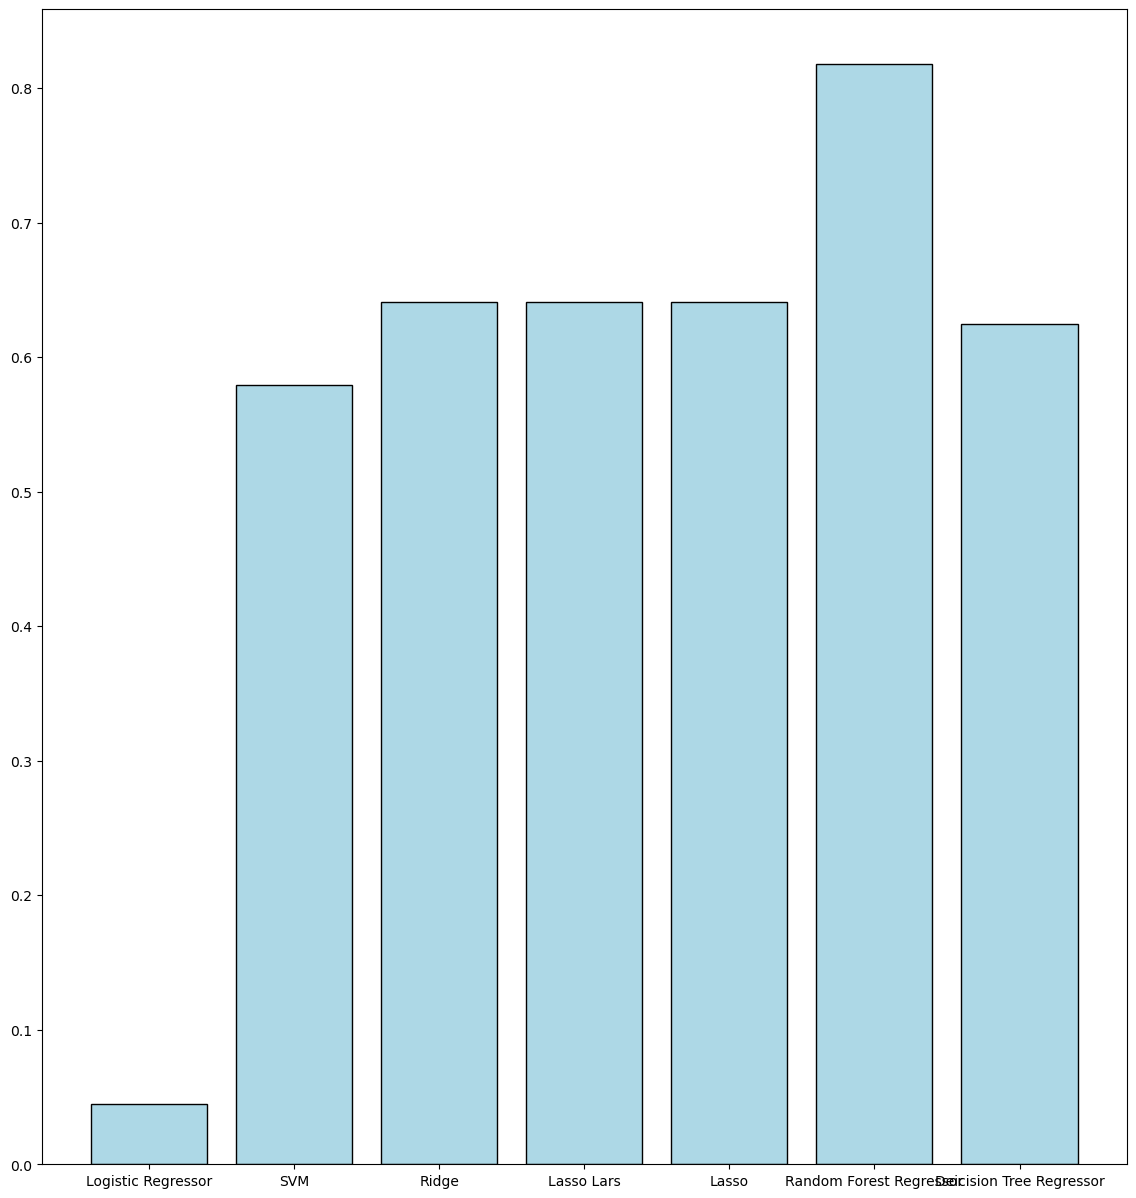

In [20]:
estimator_names = list(model_scores.keys())
estimator_score = list(model_scores.values())

fig, ax = plt.subplots(figsize=(14,15))

ax.bar(range(len(model_scores)), estimator_score, tick_label= estimator_names, color='lightblue', width=0.8, edgecolor='black');

## Model Fit

In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)

model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [22]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [23]:
model.score(X_test,y_test)

0.8259549586209579

In [24]:
y_preds = model.predict(X_test)
y_preds

array([ 65.88      ,  88.81689655, 118.72      , ..., 265.76      ,
        91.17      ,  77.78      ])

In [25]:
y_test

6428     89.0
3737    104.0
3890    109.0
5678     59.0
6786     69.0
        ...  
4400     86.0
889     106.0
1444    270.0
3952     94.0
491      66.0
Name: AQI, Length: 1417, dtype: float64

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_true=y_test, y_pred=y_preds))
print(mean_absolute_error(y_true=y_test, y_pred=y_preds))
print(mean_squared_error(y_true=y_test, y_pred=y_preds))

0.8259549586209579
15.067889108958877
604.5019658655899


## Improving the model


In [27]:
fill_nan_values(X)
fill_nan_values(y)

In [28]:
from sklearn.model_selection import cross_val_score
val_scores = cross_val_score(model, X, y, cv=10)
print(val_scores)
print(f"The mean value scores: {np.mean(val_scores)}")

[0.88300724 0.81284094 0.83140234 0.83456494 0.85507411 0.86895473
 0.85224094 0.85369113 0.89180301 0.81232117]
The mean value scores: 0.8495900556409168


In [29]:
cv_r2 = cross_val_score(model, X, y, cv=10, scoring=None)
print(cv_r2)
cv_mae = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
print(cv_mae)
cv_mse = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
print(cv_mse)

[0.88180844 0.81178625 0.82917131 0.83220282 0.85163226 0.87265106
 0.8520203  0.85193117 0.89364938 0.80911769]
[-13.24504487 -14.84849997 -14.1806341  -13.60441139 -14.0802065
 -12.97209083 -14.44913719 -13.70609997 -12.68017877 -15.32410093]
[-381.07090696 -611.66980605 -572.09481814 -511.88647813 -542.96656481
 -406.12868408 -565.80487276 -527.19978298 -385.80383442 -640.47213087]


In [30]:
print(f"Printing the mean of the value: {np.mean(cv_r2)}")

Printing the mean of the value: 0.8485970656139022


In [32]:
# Increasing the estimators 

mod = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
mod.fit(X_train, y_train)
mod.score(X_test, y_test)

0.8256049594714655

In [33]:
mod = RandomForestRegressor(n_estimators=2500, n_jobs=-1)
mod.fit(X_train, y_train)
mod.score(X_test, y_test)

0.8256691581340375

In [34]:
mod = RandomForestRegressor(n_estimators=2700, n_jobs=-1)
mod.fit(X_train, y_train)
mod.score(X_test, y_test)

0.8260439428712231

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rf_grid = {
    'bootstrap': [True],
    'max_depth': [5, 8, 10, 20, 50, 100],
    'max_features':[2, 3, 'sqrt', 'auto'],
    'min_samples_leaf':[3, 4, 5],
    'min_samples_split': [5, 10, 20],
    'n_estimators':[1000, 2000, 2500]
}

rf_model = RandomForestRegressor()

rf = RandomizedSearchCV(estimator=rf_model,
                        param_distributions=rf_grid,
                       n_iter=20,
                       verbose=2,
                       cv=5,
                       random_state=42)

rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2500; total time= 2.0min


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2500; total time= 2.1min


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2500; total time= 2.1min


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2500; total time= 2.0min


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2500; total time=74.0min
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time=92.6min
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time=  34.7s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time=  34.4s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time=  34.9s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time=  34.5s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=2500; total time= 1.1min
[CV] END bootstrap=True, max_depth=100, max_featur

C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=1000; total time= 1.5min


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=1000; total time= 1.5min


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=1000; total time= 1.5min


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=1000; total time= 1.6min


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=1000; total time= 1.6min
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  13.7s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  13.8s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  13.8s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  13.7s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  13.6s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=20, n_estimators=2000; total time=  39.4s
[CV] END bootstrap=True, max_depth=50, max_feat

C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=  46.3s


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=  46.3s


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=  46.0s


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=12.0min


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=  47.4s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time= 1.1min
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time= 1.1min
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time= 1.0min
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time= 1.1min
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time=  50.1s
[CV] END bootstrap=True, max_depth=10, max_features=3,

C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 8, 10, 20, 50, 100],
                                        'max_features': [2, 3, 'sqrt', 'auto'],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [1000, 2000, 2500]},
                   random_state=42, verbose=2)

In [ ]:
rf.best_params_

{'n_estimators': 2500,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [ ]:
rf.score(X_test, y_test)

0.8161801114782911

In [ ]:
from sklearn.model_selection import GridSearchCV

gf_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100, 110],
    'max_features':[2, 3, 'sqrt'],
    'min_samples_leaf':[2, 3, 4],
    'min_samples_split': [5, 10, 20],
    'n_estimators':[2000, 2500]
}

gs_model = RandomForestRegressor()

gs = GridSearchCV(estimator=gs_model,
                  param_grid = gf_grid,
                  cv=5, n_jobs=-1, verbose=2)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [90, 100, 110],
                         'max_features': [2, 3, 'sqrt'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [2000, 2500]},
             verbose=2)

In [ ]:
gs.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 2500}

In [ ]:
gs.score(X_test, y_test)

0.8249648630236339

## SYNTHETIC DATA


In [35]:
## Solving the biase problem

df_tmp1 = df.copy()
df_tmp1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
5796,12.82,46.91,2.15,11.42,7.61,24.26,0.63,17.99,NaN,2.83,0.55,1.08,60.0,Satisfactory
65,NaN,81.96,10.62,4.71,15.71,1.04,0.40,16.41,51.73,5.26,1.84,57.95,90.0,Satisfactory
492,33.85,90.19,13.24,7.67,14.70,6.27,0.77,7.90,12.73,5.00,1.50,1.27,65.0,Satisfactory
4637,11.82,33.96,4.61,16.85,12.60,67.91,0.31,9.75,27.78,3.19,3.58,0.66,50.0,Good
2746,35.83,74.43,3.30,10.09,8.10,25.09,0.46,4.91,11.21,4.49,0.09,0.63,72.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,50.34,121.58,1.28,15.21,16.54,5.00,0.51,11.47,5.05,6.69,2.15,1.17,189.0,Moderate
2587,103.85,120.42,7.28,10.70,11.59,29.38,0.65,7.38,3.11,6.63,0.25,0.90,105.0,Moderate
4239,24.45,103.82,10.07,15.54,16.53,42.02,0.76,8.62,3.12,5.47,0.15,1.44,80.0,Satisfactory
1092,77.52,151.79,22.93,8.18,23.01,7.30,1.02,11.59,12.69,8.58,0.81,1.60,174.0,Moderate


In [36]:
df_tmp1.isna().sum()

PM2.5         664
PM10          300
NO            828
NO2           707
NOx           624
NH3           826
CO            116
SO2           226
O3            264
Benzene       290
Toluene       302
Xylene        292
AQI           182
AQI_Bucket    182
dtype: int64

In [37]:
df_tmp1.drop(['AQI_Bucket'], axis=1, inplace=True)
df_tmp1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
5796,12.82,46.91,2.15,11.42,7.61,24.26,0.63,17.99,NaN,2.83,0.55,1.08,60.0
65,NaN,81.96,10.62,4.71,15.71,1.04,0.40,16.41,51.73,5.26,1.84,57.95,90.0
492,33.85,90.19,13.24,7.67,14.70,6.27,0.77,7.90,12.73,5.00,1.50,1.27,65.0
4637,11.82,33.96,4.61,16.85,12.60,67.91,0.31,9.75,27.78,3.19,3.58,0.66,50.0
2746,35.83,74.43,3.30,10.09,8.10,25.09,0.46,4.91,11.21,4.49,0.09,0.63,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,50.34,121.58,1.28,15.21,16.54,5.00,0.51,11.47,5.05,6.69,2.15,1.17,189.0
2587,103.85,120.42,7.28,10.70,11.59,29.38,0.65,7.38,3.11,6.63,0.25,0.90,105.0
4239,24.45,103.82,10.07,15.54,16.53,42.02,0.76,8.62,3.12,5.47,0.15,1.44,80.0
1092,77.52,151.79,22.93,8.18,23.01,7.30,1.02,11.59,12.69,8.58,0.81,1.60,174.0


In [38]:
df_syn = df_tmp1[df_tmp1['AQI']>=125]
df_syn

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2329,67.02,82.04,31.60,26.32,42.60,70.30,0.73,11.56,8.97,3.22,0.37,1.06,148.0
1277,86.11,160.42,9.85,5.83,11.10,6.00,0.63,12.21,39.46,3.13,8.62,0.84,194.0
1690,142.45,236.51,14.96,17.54,15.43,NaN,0.93,10.86,3.20,43.32,2.66,2.49,232.0
1270,62.92,100.64,12.05,7.13,13.13,6.20,0.72,9.12,4.45,3.37,5.44,1.13,199.0
2621,95.85,125.30,NaN,NaN,NaN,NaN,0.69,11.75,11.05,7.82,0.22,0.82,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780,106.59,143.52,NaN,NaN,NaN,NaN,0.45,11.70,29.07,1.61,5.91,2.91,258.0
1420,123.88,167.95,5.09,5.43,8.20,4.69,0.65,13.45,69.16,2.88,5.52,0.58,255.0
1736,71.76,138.27,14.51,23.10,13.17,NaN,0.69,8.56,4.27,1.76,4.14,2.89,257.0
1980,50.34,121.58,1.28,15.21,16.54,5.00,0.51,11.47,5.05,6.69,2.15,1.17,189.0


In [39]:
df_tmp1 = pd.concat([df_tmp1, df_syn], ignore_index = True)
df_tmp1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,12.82,46.91,2.15,11.42,7.61,24.26,0.63,17.99,NaN,2.83,0.55,1.08,60.0
1,NaN,81.96,10.62,4.71,15.71,1.04,0.40,16.41,51.73,5.26,1.84,57.95,90.0
2,33.85,90.19,13.24,7.67,14.70,6.27,0.77,7.90,12.73,5.00,1.50,1.27,65.0
3,11.82,33.96,4.61,16.85,12.60,67.91,0.31,9.75,27.78,3.19,3.58,0.66,50.0
4,35.83,74.43,3.30,10.09,8.10,25.09,0.46,4.91,11.21,4.49,0.09,0.63,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8424,106.59,143.52,NaN,NaN,NaN,NaN,0.45,11.70,29.07,1.61,5.91,2.91,258.0
8425,123.88,167.95,5.09,5.43,8.20,4.69,0.65,13.45,69.16,2.88,5.52,0.58,255.0
8426,71.76,138.27,14.51,23.10,13.17,NaN,0.69,8.56,4.27,1.76,4.14,2.89,257.0
8427,50.34,121.58,1.28,15.21,16.54,5.00,0.51,11.47,5.05,6.69,2.15,1.17,189.0


In [40]:
df_tmp1 = df_tmp1.sample(frac=1)
df_tmp1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
25,22.70,69.63,2.13,10.99,7.53,23.51,0.71,11.47,17.74,4.38,0.83,1.26,59.0
7276,58.61,81.67,NaN,NaN,NaN,NaN,0.71,8.96,3.35,1.04,3.91,3.74,125.0
6688,30.95,36.40,2.90,12.39,8.74,30.27,0.68,11.92,17.38,3.31,0.61,1.44,51.0
3817,19.84,98.16,7.12,3.46,10.70,0.63,0.47,5.08,55.73,4.52,0.04,3.49,93.0
7565,92.20,114.94,6.77,22.91,17.13,38.03,0.63,10.01,8.52,7.54,0.38,0.85,177.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,73.83,125.29,29.07,5.93,26.41,33.94,0.69,8.56,3.99,7.50,0.15,0.32,100.0
6321,32.93,43.49,1.31,18.71,10.79,38.04,0.62,9.17,1.84,5.83,0.15,1.10,115.0
1730,24.88,117.83,1.71,17.66,9.97,58.81,0.75,6.17,0.10,6.93,0.18,0.91,81.0
1560,63.60,100.20,8.53,3.64,8.70,5.00,0.42,6.60,12.26,5.43,0.24,0.08,169.0


In [41]:
df_tmp1.isna().sum()

PM2.5       716
PM10        346
NO         1096
NO2         938
NOx         843
NH3        1153
CO          117
SO2         234
O3          269
Benzene     304
Toluene     321
Xylene      306
AQI         182
dtype: int64

In [42]:
df_tmp1.dropna(subset=['AQI'], inplace=True)
df_tmp1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
25,22.70,69.63,2.13,10.99,7.53,23.51,0.71,11.47,17.74,4.38,0.83,1.26,59.0
7276,58.61,81.67,NaN,NaN,NaN,NaN,0.71,8.96,3.35,1.04,3.91,3.74,125.0
6688,30.95,36.40,2.90,12.39,8.74,30.27,0.68,11.92,17.38,3.31,0.61,1.44,51.0
3817,19.84,98.16,7.12,3.46,10.70,0.63,0.47,5.08,55.73,4.52,0.04,3.49,93.0
7565,92.20,114.94,6.77,22.91,17.13,38.03,0.63,10.01,8.52,7.54,0.38,0.85,177.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,73.83,125.29,29.07,5.93,26.41,33.94,0.69,8.56,3.99,7.50,0.15,0.32,100.0
6321,32.93,43.49,1.31,18.71,10.79,38.04,0.62,9.17,1.84,5.83,0.15,1.10,115.0
1730,24.88,117.83,1.71,17.66,9.97,58.81,0.75,6.17,0.10,6.93,0.18,0.91,81.0
1560,63.60,100.20,8.53,3.64,8.70,5.00,0.42,6.60,12.26,5.43,0.24,0.08,169.0


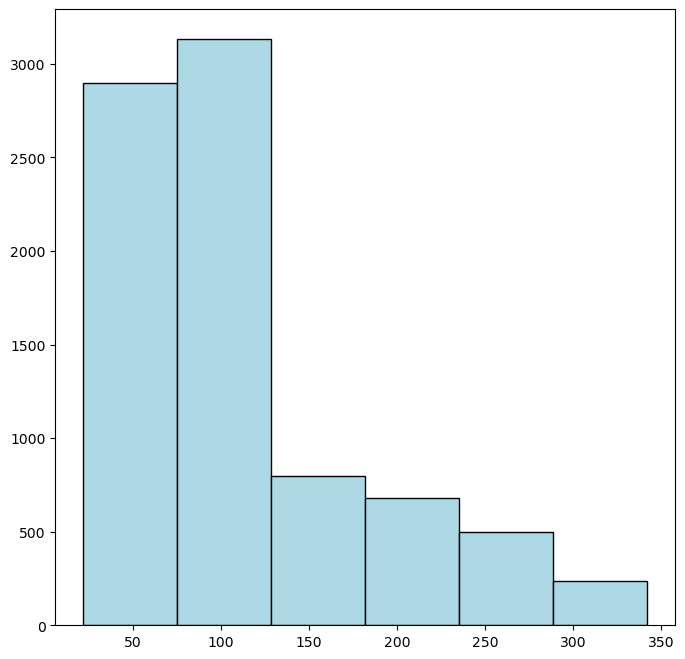

In [43]:
fig, ax = plt.subplots(figsize=(8,8))
ax.hist(df_tmp1['AQI'], color='lightblue', bins=6, edgecolor='black');
plt.show()

In [44]:
# Split into X & y
X = df_tmp1.drop('AQI', axis=1);
y = df_tmp1['AQI']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
fill_nan_values(X_train);
fill_nan_values(X_test);
fill_nan_values(y_train);
fill_nan_values(y_test);

In [47]:
models = { 'Logistic Regressor': LogisticRegression(),
         'SVM': SVR(),
         'Ridge': Ridge(),
         'Lasso Lars': LassoLars(),
         'Lasso': Lasso(),
         'Random Forest Regressor': RandomForestRegressor(),
         'Deicision Tree Regressor': DecisionTreeRegressor()}

model_scores1 = model_fit_and_score(models,X_train, X_test, y_train, y_test)
model_scores1

C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regressor': 0.034545454545454546,
 'SVM': 0.6487341823323158,
 'Ridge': 0.6135812045616506,
 'Lasso Lars': 0.6131762035810666,
 'Lasso': 0.613174207294874,
 'Random Forest Regressor': 0.9125427613031679,
 'Deicision Tree Regressor': 0.8356170706575128}

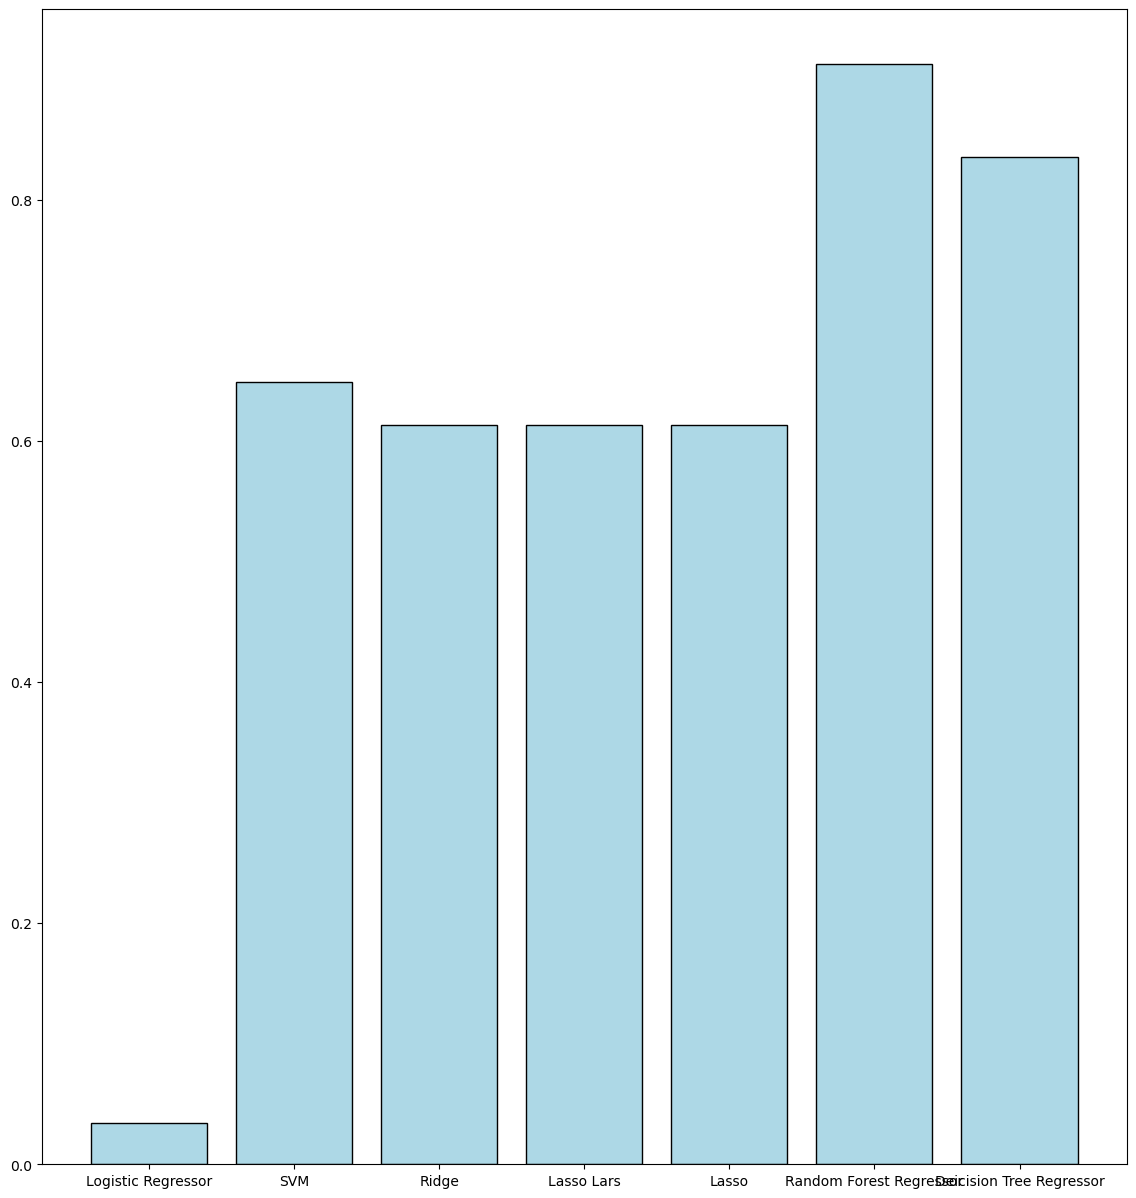

In [48]:
estimator_names = list(model_scores1.keys())
estimator_score = list(model_scores1.values())

fig, ax = plt.subplots(figsize=(14,15))

ax.bar(range(len(model_scores1)), estimator_score, tick_label= estimator_names, color='lightblue', width=0.8, edgecolor='black');

In [49]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_jobs=-1)

model1.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [50]:
model1.score(X_test, y_test)

0.9074690301495617

In [51]:
y_pred1 = model1.predict(X_test)
y_pred1

array([116.16,  66.1 , 220.38, ...,  68.26,  52.65, 194.92])

In [52]:
y_test

3531    112.0
7186     80.0
4842    235.0
7542    146.0
7755    164.0
        ...  
5011     65.0
3887     94.0
5156     80.0
3783     49.0
3484    220.0
Name: AQI, Length: 1650, dtype: float64

In [53]:
print(r2_score(y_true=y_test, y_pred=y_pred1))
print(mean_absolute_error(y_true=y_test, y_pred=y_pred1))
print(mean_squared_error(y_true=y_test, y_pred=y_pred1))

0.9074690301495617
13.000588992002623
465.73436095501506


In [54]:
fill_nan_values(X)
fill_nan_values(y)

from sklearn.model_selection import cross_val_score
val_scores = cross_val_score(model, X, y, cv=10)
print(val_scores)
print(f"The mean value scores: {np.mean(val_scores)}")

[0.94619402 0.95093476 0.9338547  0.93914055 0.94113008 0.93499388
 0.93071819 0.92956984 0.94273865 0.93651082]
The mean value scores: 0.9385785473839074


## Improving the model


In [55]:
fill_nan_values(X)
fill_nan_values(y)

In [56]:
model1a = RandomForestRegressor(n_estimators=3000, n_jobs=-1)
model1a.fit(X_train, y_train)
model1a.score(X_test, y_test)

0.9105885827605797

In [57]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rf_grid = {
    'bootstrap': [True],
    'max_depth': [5, 8, 10, 20, 50, 100],
    'max_features':[2, 3, 'sqrt', 'auto'],
    'min_samples_leaf':[3, 4, 5],
    'min_samples_split': [5, 10, 20],
    'n_estimators':[1000, 2000, 2500]
}

rf_model = RandomForestRegressor()

rf = RandomizedSearchCV(estimator=rf_model,
                        param_distributions=rf_grid,
                       n_iter=20,
                       verbose=2,
                       cv=5,
                       random_state=42)

rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2500; total time= 5.0min


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2500; total time= 4.9min


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2500; total time= 5.1min


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2500; total time= 5.1min


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2500; total time= 5.0min
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time=  41.4s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time=  41.3s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time=  41.3s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time=  41.6s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time=  41.5s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=20, n_estimators=2500; total time= 1.4min
[CV] END bootstrap=True, max_depth=100, max_featur

C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=1000; total time= 1.8min


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=1000; total time= 1.8min


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=1000; total time= 1.8min


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=1000; total time= 1.8min


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=1000; total time= 1.8min
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  16.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  16.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  16.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  16.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  16.3s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=20, n_estimators=2000; total time=  49.7s
[CV] END bootstrap=True, max_depth=50, max_feat

C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=  52.8s


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=  53.5s


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=  53.3s


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=  52.6s


C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=  52.1s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time= 1.3min
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time= 1.3min
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time= 1.3min
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time= 1.3min
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time= 1.3min
[CV] END bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=2000; total time=  58.0s
[CV] END bootstrap=True, max_depth=10, max_features=3,

C:\Users\Anavi Sharma\Desktop\internship\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 8, 10, 20, 50, 100],
                                        'max_features': [2, 3, 'sqrt', 'auto'],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [1000, 2000, 2500]},
                   random_state=42, verbose=2)

In [59]:
rf.best_params_

{'n_estimators': 2500,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [58]:
rf.score(X_test, y_test)

0.8822250730837153

In [ ]:
from sklearn.model_selection import GridSearchCV

gf_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100, 110],
    'max_features':[1, 2, 3, 'sqrt'],
    'min_samples_leaf':[1, 2, 3, 4],
    'min_samples_split': [1, 3, 5, 10, 20],
    'n_estimators':[1000,2000, 2500]
}

gs_model = RandomForestRegressor()

gs = GridSearchCV(estimator=gs_model,
                  param_grid = gf_grid,
                  cv=5, n_jobs=-1, verbose=2)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score, mean_squared_error

def rmsle(y_test, y_preds):
    """
    Calculate root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on few different levels
def show_score(model):
    y_preds = model.predict(X_test)
    scores = {'MAE (Mean Absolute Error)': mean_absolute_error(y_test, y_preds),
             'RMSLE(Root Mean Square Logarithmic Error)': rmsle(y_test, y_preds),
             'R^2': r2_score(y_test, y_preds),
             'MSE (Mean Squared Error)': mean_squared_error(y_test, y_preds)}
    return scores

In [ ]:
show_score(model)

{'MAE (Mean Absolute Error)': 15.058125453694005,
 'RMSLE(Root Mean Square Logarithmic Error)': 0.22368556508829962,
 'R^2': 0.8325942255689456,
 'MSE (Mean Squared Error)': 575.36924105369}